# Exploratory Data Analysis of DroneRF

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from src.data.preprocess_data import prepare_data

In [2]:
data = pd.read_csv('./data/processed/combined_RF_Data_with_labels.csv')

In [3]:
data.head(-5)

,0,1,2,3,4,5,6,7,8,9,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048
0,99960.383105,144491.277098,67509.687519,353678.589266,179610.092078,123225.905578,197539.154650,285239.244818,142365.877018,197117.080496,...,1004.351962,4693.246319,1538.236333,6141.352465,6526.354348,19096.299114,13558.563285,15270.059943,1440.036189,0.0
1,40085.037148,9588.252136,17058.554080,14719.488958,8072.615565,54905.210829,2213.120696,2269.927906,11432.638868,25970.552374,...,82253.106379,31905.369838,2020.913936,32602.369037,72551.388055,1359.821991,29112.643810,5565.234397,3409.809802,0.0
2,5934.520645,6878.466919,24978.202418,29597.225321,33215.379671,3628.769029,7709.433880,4127.557989,21248.001505,15278.984132,...,62628.103789,17192.164042,8687.768613,1253.662960,4238.062016,4287.809585,76401.390599,10133.728648,15652.232802,0.0
3,220.491613,30561.520557,24828.580215,28497.951697,530.545801,26647.271997,6501.346378,2641.342304,4269.118108,8496.036728,...,23280.337636,23196.938029,15740.890749,1489.863584,27643.843060,7607.918626,36330.522189,26000.615647,2133.041133,0.0
4,5568.454824,6520.865740,7974.086063,28381.931684,2955.276027,7602.680954,5148.909209,467.517616,2648.229659,38575.769022,...,3096.296217,14663.095154,3818.075756,9480.397571,16249.589306,11801.561673,5325.458477,10520.000611,80042.658260,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4690,8883.891919,1548.245414,5279.942188,24517.865494,117.723712,2023.078904,22829.836191,13008.322335,2884.490638,2667.588534,...,207.354756,10386.841465,5537.036238,18749.407250,1465.892795,8557.537705,9233.837539,24094.822686,26387.581224,2.0
4691,28905.440256,33877.061509,6672.114108,7183.075012,1472.894554,3301.322982,42773.849728,23992.634268,1527.428514,5375.623190,...,8488.665336,103.818883,17091.975406,13446.634178,101035.750340,8132.870370,19997.785616,11159.278413,42125.536951,2.0
4692,81107.576869,223732.421905,40296.108804,90583.814946,77232.737470,100205.201684,78253.903887,85492.818672,158482.453974,74795.942346,...,88889.065807,71211.116665,19113.559160,3101.422224,90932.948073,27780.177981,93.698794,388.780072,5244.012667,2.0
4693,52477.793011,9727.095058,9713.654477,8294.331683,1199.695143,16432.746676,9359.644574,39582.364260,37052.571115,12292.400581,...,17485.331285,5609.918726,7551.499326,7998.454932,12900.855720,45981.292393,80656.794167,32521.998274,11254.233375,2.0


In [4]:
print(data.shape)

(4700, 2049)


In [5]:
print(data.iloc[:,2048].value_counts())

2048
0.0    4100
1.0     300
2.0     300
Name: count, dtype: int64


We have 4100 rows of background signal data, 300 rows of drone 1 signal data, and 300 rows of drone 2 signal data

In [6]:
background_data = data[data.iloc[:,2048] == 0].iloc[:, :-1]
drone1_data = data[data.iloc[:,2048] == 1].iloc[:, :-1]
drone2_data = data[data.iloc[:,2048] == 2].iloc[:, :-1]

In [10]:
def plot_mean_std(data, label):
    mean = data.mean(axis=0)
    std = data.std(axis=0)
    
    plt.figure(figsize=(12, 6))
    plt.plot(mean, label='Mean')
    plt.fill_between(range(len(mean)), mean-std, mean+std, alpha=0.3, label='Std Dev')
    plt.title(f'{label} Signal Analysis')
    plt.xlabel('Frequency Bin')
    plt.ylabel('Magnitude')
    plt.legend()
    plt.show()
    
    return mean, std

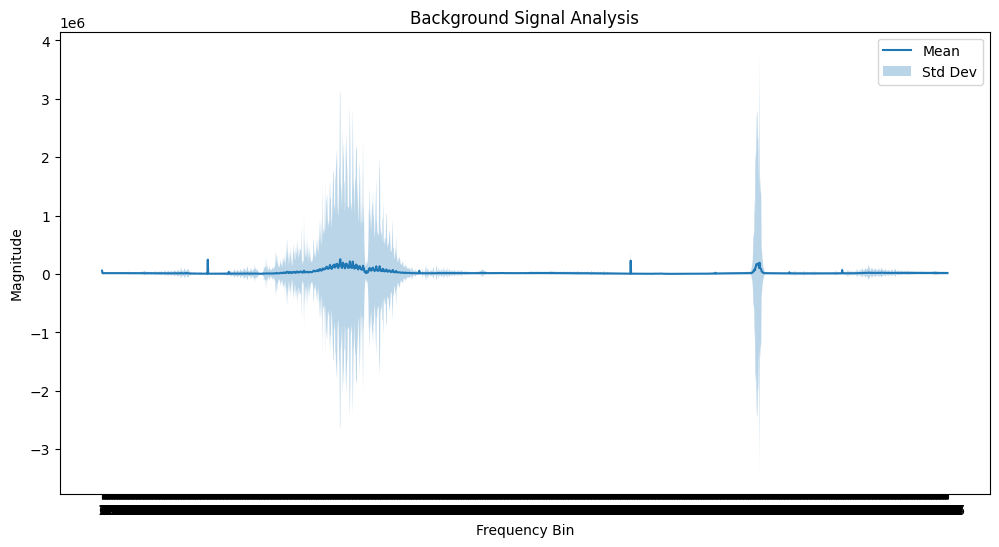

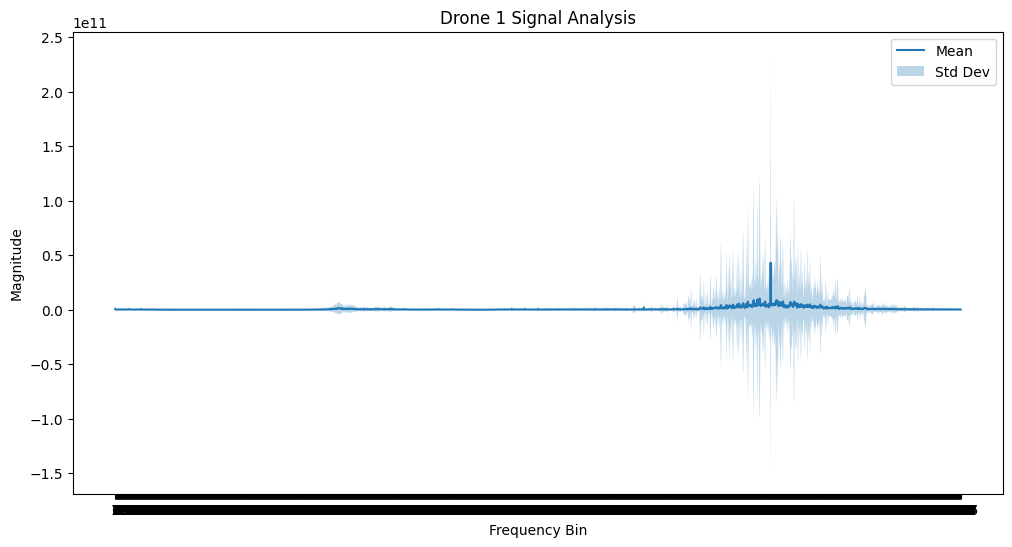

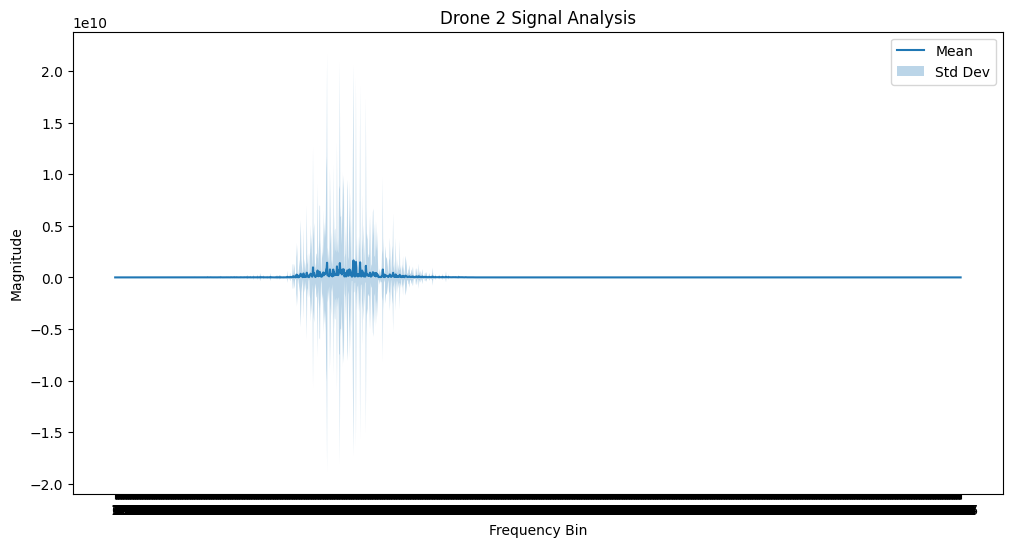

In [12]:
bg_mean, bg_std = plot_mean_std(background_data, 'Background')
d1_mean, d1_std = plot_mean_std(drone1_data, 'Drone 1')
d2_mean, d2_std = plot_mean_stdplt.figure(figsize=(12, 6))
plt.plot(bg_mean, label='Background', alpha=0.7)
plt.plot(d1_mean, label='Drone 1', alpha=0.7)
plt.plot(d2_mean, label='Drone 2', alpha=0.7)
plt.title('Comparison of Mean Frequency Bin Values')
plt.xlabel('Frequency Bin')
plt.ylabel('Magnitude')
plt.legend()
plt.show()
(drone2_data, 'Drone 2')

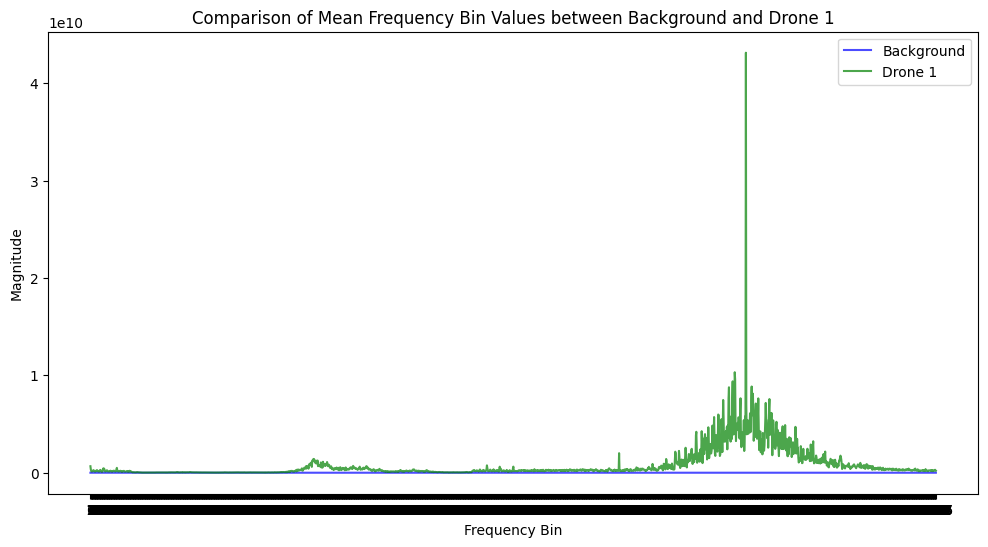

In [33]:
plt.figure(figsize=(12, 6))
plt.plot(bg_mean, label='Background', alpha=0.7, color='b')
plt.plot(d1_mean, label='Drone 1', alpha=0.7, color='g')
plt.title('Comparison of Mean Frequency Bin Values between Background and Drone 1')
plt.xlabel('Frequency Bin')
plt.ylabel('Magnitude')
plt.legend()
plt.show()

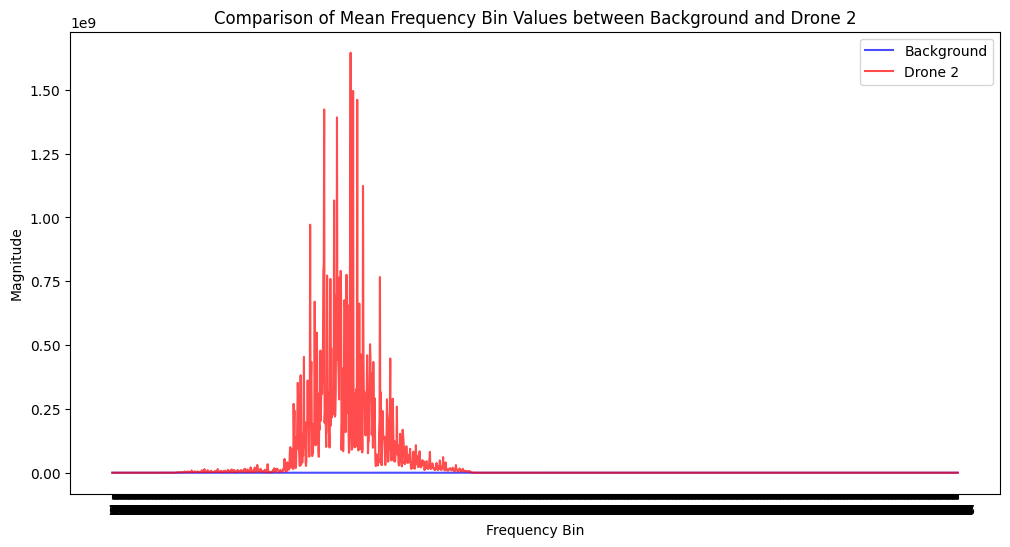

In [34]:
plt.figure(figsize=(12, 6))
plt.plot(bg_mean, label='Background', alpha=0.7, color='b')
plt.plot(d2_mean, label='Drone 2', alpha=0.7, color='r')
plt.title('Comparison of Mean Frequency Bin Values between Background and Drone 2')
plt.xlabel('Frequency Bin')
plt.ylabel('Magnitude')
plt.legend()
plt.show()

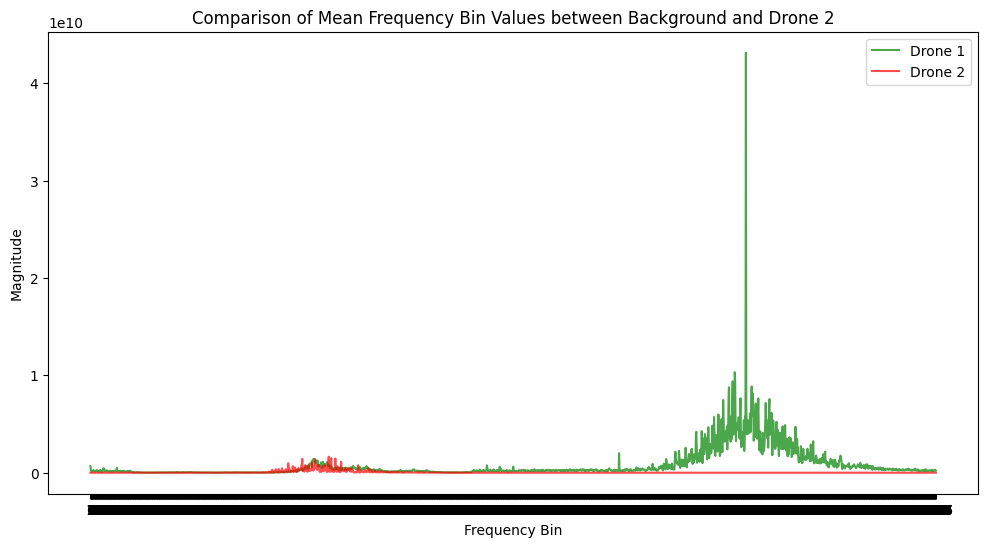

In [35]:
plt.figure(figsize=(12, 6))
plt.plot(d1_mean, label='Drone 1', alpha=0.7, color='g')
plt.plot(d2_mean, label='Drone 2', alpha=0.7, color='r')
plt.title('Comparison of Mean Frequency Bin Values between Background and Drone 2')
plt.xlabel('Frequency Bin')
plt.ylabel('Magnitude')
plt.legend()
plt.show()

In [14]:
def find_significant_bins(drone_mean, bg_mean, bg_std, z_threshold=3):
    z_scores = (drone_mean - bg_mean) / bg_std
    significant_bins = np.where(np.abs(z_scores) > z_threshold)[0]
    return significant_bins

d1_sig_bins = find_significant_bins(d1_mean, bg_mean, bg_std)
d2_sig_bins = find_significant_bins(d2_mean, bg_mean, bg_std)

Significant frequency bins for Drone 1: [   0    1    2 ... 2045 2046 2047]
Significant frequency bins for Drone 2: [131 139 141 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158
 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176
 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194
 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212
 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230
 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248
 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266
 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284
 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302
 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320
 321 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338
 339 340 341 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356
 357 358

## Checking for normality

## Frequency Bin analysis